# Caution

차원을 축소시키면 일부 정보가 유실된다. 그래서 훈련 속도가 빨라질 수는 있지만 시스템의 성능이 조금 나빠질 수 있다. 또한 작업 파이프라인이 조금 더 복잡하게 되고 유지 관리가 어려워진다. 그러므로 차원 축소를 고려하기 전에 훈련이 너무 느린지 먼저 원본 데이터로 시스템을 훈련해봐야 한다. 

# 8.1 차원의 저주

- 고차원은 많은 공간을 가지고 있기에 고차원 데이터셋은 매우 희박할 위험이 있다. 즉, 대부분의 훈련 데이터가 서로 멀리 떨어져 있으며 이는 새로운 샘플도 훈련 샘플과 멀리 떨어져 있을 가능성이 높다는 걸 의미한다.

- 예측을 위해 훨씬 많은 외삽을 해야 하기에 과대적합의 위험이 커진다.

- 해결 아이디어 중 하나는, 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것이지만, 필요한 훈련 샘플 수는 차원 수가 커짐에 따라 기하급수적으로 늘어난다.

# 8.2 차원 축소를 위한 접근 방법

## 8.2.1 투영

대부분의 실전 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않다. 일부 다른 특성들이 서로 강하게 연관되어 있으며, 결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 subspace에 놓여 있다.

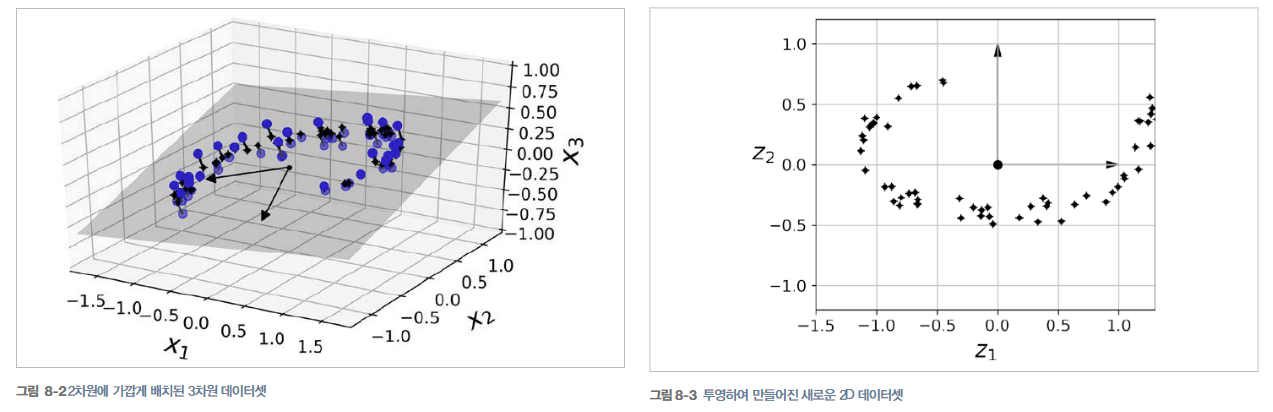

## 8.2.2 매니폴드 학습

일반적으로 d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부이다.(d < n) 

많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동하며 이를 매니폴드 학습이라고 한다.

이는 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 매니폴드 가정 또는 매니폴드 가설에 근거한다.

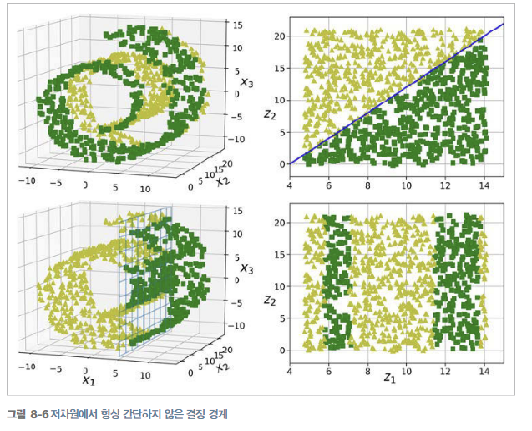

요약하면 모델을 훈련시키기 전에 훈련 세트의 차원을 감소시키면 훈련 속도는 빨라지지만 항상 더 낫거나 간단한 솔루션이 되는 것은 아니다. 이는 전적으로 데이터셋에 달렸다.

# 8.3 PCA

PCA는 먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시킨다.

## 8.3.0 스위스롤 데이터셋 생성

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

## 8.3.1 분산 보존

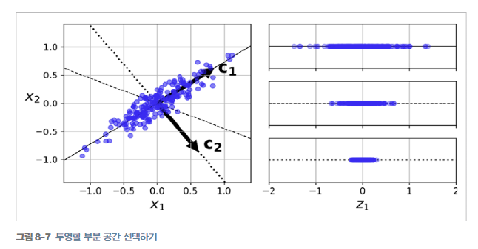

다른 방향으로 투영하는 것보다 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적으로 보인다.

즉, 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축이다.

## 8.3.2 주성분

훈련 세트의 주성분은 특이값 분해(singular value decomposition; SVD) - 표준 행렬 분해 기술 - 를 통해 훈련 세트 행렬 x를 세 개의 행렬 곱셈인  $U∑V^T$ 로 분해할 수 있다.

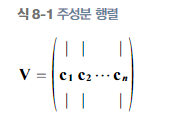

## 8.3.3 d차원으로 투영하기

초평면에 훈련 세트를 투영하고 d차원으로 축소된 데이터셋 $X^{(d proj)}$ 을 얻기 위해서는 행렬 x 와 v 의 첫 d 열로 구성된 행렬 W_d를 행렬 곰셈하면 된다.

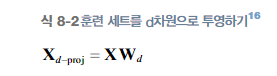

## 8.3.4 사이킷런 사용하기

In [ ]:
# 3D 데이터 생성
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
X2D[:5]

array([[ 1.19317363,  0.36450614],
       [-0.82062161, -0.26003048],
       [-1.09203545, -0.17480702],
       [ 0.07205372, -0.31312846],
       [ 1.21291984,  0.16711359]])

In [ ]:
# 평면(pca 2차원 부분공간)에 투영된 3d 포인트를 복원한다.
X3D_inv = pca.inverse_transform(X2D)

In [ ]:
# 일부 손실된 정보가 있기에 원본 3d 포인트와 완전히 똑같지는 않다.
np.allclose(X3D_inv, X)

False

In [ ]:
# 재구성 오차를 계산한다.
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.007900604596974909

In [ ]:
# PCA 객체를 사용하여 계산된 주성분을 참조할 수 있다.
pca.components_

array([[-0.94085977, -0.2805278 , -0.18996591],
       [ 0.3266787 , -0.89979884, -0.28921112]])

## 8.3.5 설명된 분산의 비율

explained_variance_ratio 비율은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다. 

In [ ]:
pca.explained_variance_ratio_

array([0.8518782 , 0.13930037])

이 데이터셋의 분산은 85.2% 가 첫 번째 주성분을 따라 놓여 있고, 13.9% 가 두 번째 주성분을 따라 놓여 있음을 보인다.

## 8.3.6 적절한 차원 수 선택하기

축소할 차원 수를 임의로 정하기보다는 충분한 분산 (일반적으로 95%) 이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다.

다음 코드는 차원을 축소하지 않고 pca 를 계산한 뒤, 훈련 세트의 분산을 95% 로 유지하는데 필요한 최소한의 차원 수를 계산한다.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
print(d)

154


In [ ]:
# 유지하려는 주성분의 수 보다는 분산의 비율을 n_components에 0.0-1.0 사이 값으로 입력
pca = PCA(n_components=0.95)
x_reduced = pca.fit(X_train)

설명된 분산을 차원 수에 대한 함수로 그려서, 빠른 성장이 멈추는 변곡점을 찾는다.

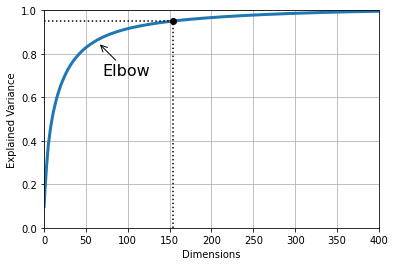

In [ ]:
# 맨 처음 pca 재실행 후 그래프 코드 실행
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

## 8.3.7 압축을 위한 PCA

압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 원래의 차원으로 되돌릴 수도 있다. 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리를 재구성 오차라고 한다.

In [ ]:
# MNIST 데이터셋을 154 차원으로 압축
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train) 
X_recovered = pca.inverse_transform(X_reduced)

## 8.3.8 랜덤 PCA

svd_solver 매개변수를 "randomized" 로 지정하면 랜덤 PCA 라 부르는 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾는다. 

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 8.3.9 점진적 PCA

PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것이다. 

점진적 PCA 알고리즘(IPCA)은 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 하나씩 주입한다.

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  print(".", end="")
  inc_pca.partial_fit(X_batch)

X_reduced = inc.pca.transform(X_train)

................................................................

KeyboardInterrupt: ignored

# 8.4 커널 PCA

5 장에서 샘플을 매우 높으 고차원 공간(특성 공간, feature space)으로 암묵적으로 매핑하여 서포트 벡터 머신의 비선형 분류와 회귀를 가능하게 하는 수학적 기법인 커널 트릭에 대해 이야기했다.

같은 기법을 PCA에 적용해 차원 축소를 위한 복잡한 비선형 투영을 수행할 수 있으며 이를 커널 PCA라고 한다. 

In [ ]:
# 사이킷런은 RBF 커널로 kPCA 를 적용하고 있다.
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

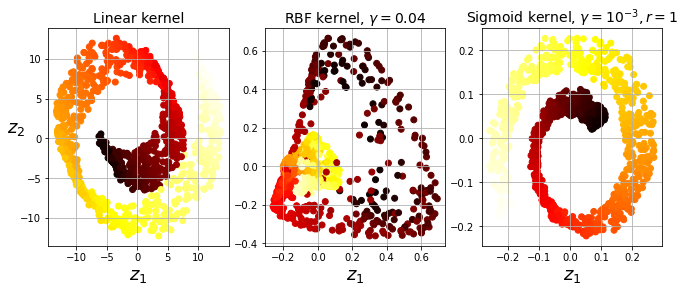

In [ ]:
# 여러 가지 커널의 kPCA를 사용해 이차원으로 축소시킨 스위스 롤
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

## 8.4.1 커널 선택과 하이퍼파라미터 튜닝

kPCA 는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정기준이 없다. 하지만 차원 축소는 분류와 같은 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 서능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

아래의 코드는 두 단계의 파이프라인을 만드는데, 먼저 kPCA를 사용해 차원을 이차원으로 축소하고 분류를 위해 로지스틱 회귀를 적용한다.

그런 다음 파이프라인의 마지막 단계에서 가장 높은 분류 정확도를 얻기 위해 GridSearchCV를 사용해 kPCA 의 가장 좋은 커널과 gamma 파라미터를 찾는다.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

clf = Pipeline([
                ("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 10),    # np.linspace(시작점, 끝점, 구간 내 숫자 개수)
    "kpca__kernel" : ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [ ]:
# 가장 좋은 커널과 하이퍼파라미터
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


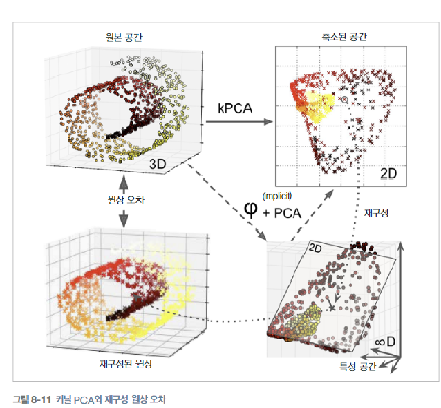

축소된 공간에 있는 샘플에 대핸 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아닌 특성 공간에 놓이게 된다. 이 특성 공간은 무한 차원이기 때문에 재구성된 포인트를 계산할 수 없고 재구성에 따른 실제 에러를 계산할 수 없다. 다행히 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다. 이를 재구성 원상이라고 한다.

재구성 원상은 원본 샘플과의 제곱 거리를 측정할 수 있으며 재구성 원상의 오차를 최소화하는 커널고 하이퍼파라미터를 선택할 수 있게 된다.

In [ ]:
# 투영된 샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

# 재구성 원상의 오차 계산
from sklearn.metrics import mean_squared_error
print(mean_squared_error(X, X_preimage))   # 각각 원본 샘플, 재구성 원상


32.78630879576608


재구성 원상 오차를 최소화하는 커널과 하이퍼파라미터를 찾기 위해 교차검증으로 그리드 탐색을 사용할 수 있다.

# 8.5 LLE

지역 선형 임베딩 ; locally linear embedding 은 또다른 강력한 비선형 차원 축소(nonlinear dimensionality reduction; NLDR) 기술이다.

투영에 의존하지 않는 매니폴드 학습이다. LLE 는 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정한 다음, 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다. 

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

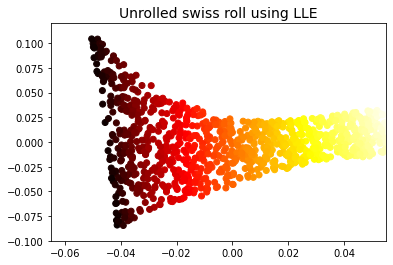

In [ ]:
# 위의 X_reduced 데이터셋의 시각화
plt.title('Unrolled swiss roll using LLE', fontsize=14)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
plt.axis([-0.065,0.055,-0.1,0.12])
plt.show()

위의 그림에서 볼 수 있듯이 스위스 롤이 완전히 펼쳐졌고 지역적으로는 샘플 간 거리가 잘 보존되어 있다.

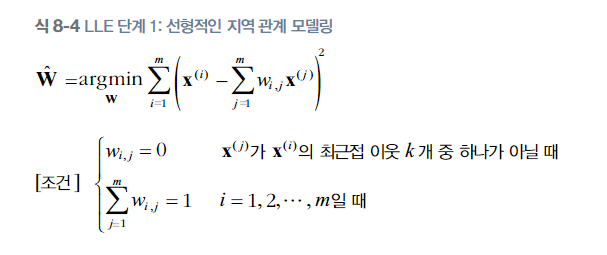

LLE 의 첫 번째 단계 

- 각 훈련 샘플 x(i) 에 가장 가까운 k 개의 샘플을 찾는다.

- x(i) 와 이웃 사이의 제곱 거리가 최소가 되는 가중치를 찾는다. 단, x(j) 가 x(i)의 가장 가까운 이웃이 아닐 경우 그때의 가중치는 0이 된다.

- 결국 위의 식과 같이 제한이 있는 최적화 문제가 되며, W는 가중치 행렬이다.

- W는 훈련 샘플 사이에 있는 지역 선형 관계를 담고 있다.

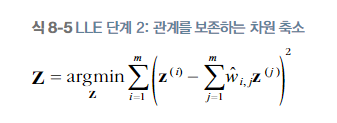

LLE의 두 번째 단계

- 두 번째 단계는 가능한 지역 선형 관계가 보존되도록 훈련 샘플을 d 차원(d < n) 공간으로 매핑한다. 

- 위의 식은 제약이 없는 최적화 문제이다. 첫 번째 단계와 비슷해 보이지만, 샘플을 고정하고 최적의 가중치를 찾는 대신, 반대로 가중치를 고정하고 저차원의 공간에서 샘플 이미지의 최적 위치를 찾는다.

# 8.6 다른 차원 축소 기법

- 랜덤 투영 (random projection)

  랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영한다. 
<br/></br>
- 다차원 스케일링(multi-dimensional scaling; MDS) 

  샘플 간의 거리를 보존하면서 차원을 축소한다.<br/></br>
- Isomap

  각 샘플을 가장 가까운 이웃과 연결하는 방식으로 그래프를 만든다. 그런 다음 샘플 간의 지오데식 거리를 유지하면서 차원을 축소한다.
<br/></br>
- t-SNE(t-distributed stochastic neighbor embedding)

  비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소한다. 주로 시각화에 많이 사용되며 특히 고차원 공간에 있는 샘플을 시각화할 때 사용된다.
<br/></br>
- 판별 분석(Linear discriminant analysis; LDA)

  분류 알고리즘이다. 하지만 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습한다. 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있따. 

  

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [ ]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


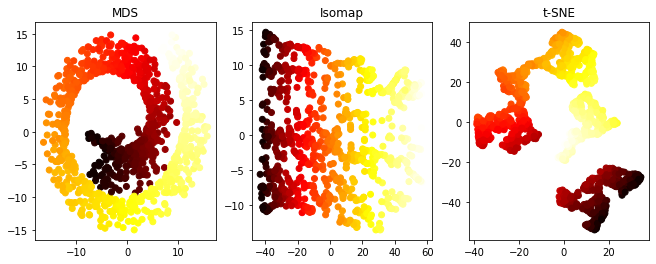

In [ ]:
# 위의 세 가지 방식을 적용한 투영 결과 시각화
titles = ['MDS', 'Isomap', 't-SNE']

plt.figure(figsize=(11,4))
for subplot, title, X_reduced in zip((131,132,133), titles, (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
  plt.subplot(subplot)
  plt.title(title)
  plt.scatter(X_reduced[:,0],X_reduced[:,1], c=t, cmap=plt.cm.hot)

plt.show()